In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
from sklearn.metrics import make_scorer,accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report

In [2]:
df = pd.read_csv('Pregnancy Risk.csv')
df.shape

(528, 16)

In [3]:
df.sample(5)

,Unnamed: 0,Age,Height,Weight,BMI,Blood Group ( is Negative?),Delivery Type,Systolic Blood Pressure,Diastolic Blood Pressure,Edema,Anemia,Jaundice,Diabetes,Risk,Para,Gravida
284,284,30,4.11,65.5,29.17,No,Normal,120.0,80.0,Normal,Modarate,No,No,No,1,3
15,15,28,5.10,54.1,22.54,No,No_delivary,120.0,80.0,Normal,Normal,No,No,No,0,1
138,138,18,5.00,63.0,27.13,No,No_delivary,120.0,60.0,Normal,Normal,No,No,Yes,0,1
35,35,24,NaN,43.6,NaN,No,Normal,110.0,80.0,Modarate,Modarate,No,No,Yes,1,2
49,49,18,4.80,40.0,19.77,No,No_delivary,110.0,70.0,Normal,Normal,No,No,Yes,0,1


In [4]:
df1 = df.drop(['Unnamed: 0'],axis=1)
df1.head(5)

,Age,Height,Weight,BMI,Blood Group ( is Negative?),Delivery Type,Systolic Blood Pressure,Diastolic Blood Pressure,Edema,Anemia,Jaundice,Diabetes,Risk,Para,Gravida
0,25,5.3,50.7,19.80,No,No_delivary,110.0,90.0,Normal,Normal,No,No,No,0,1
1,30,5.0,86.3,37.16,No,Normal,110.0,80.0,Normal,Normal,No,No,No,2,3
2,26,5.1,58.8,24.49,No,Normal,120.0,80.0,Normal,Normal,No,No,No,2,3
3,26,5.1,86.8,36.16,No,Normal,120.0,80.0,Normal,Normal,No,Yes,Yes,1,2
4,36,4.8,85.8,42.90,No,Normal,110.0,80.0,Normal,Normal,No,No,Yes,1,2


# Data Analysis

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
columns = ['Age', 'Height', 'Blood Group ( is Negative?)',
       'Delivery Type', 'Systolic Blood Pressure', 'Diastolic Blood Pressure',
       'Edema', 'Anemia', 'Jaundice', 'Diabetes','Para','Gravida']
columns

['Age',
 'Height',
 'Blood Group ( is Negative?)',
 'Delivery Type',
 'Systolic Blood Pressure',
 'Diastolic Blood Pressure',
 'Edema',
 'Anemia',
 'Jaundice',
 'Diabetes',
 'Para',
 'Gravida']

In [7]:
df1['Risk'].value_counts()

No     330
Yes    198
Name: Risk, dtype: int64

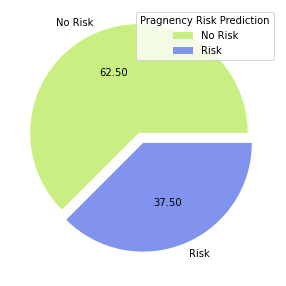

In [8]:
plt.figure(figsize=(10,5))
plt.pie(df1['Risk'].value_counts(), labels=['No Risk','Risk'], autopct = "%0.2f",explode = [0.1,0],colors = ['#c9ee82','#8293ee'])
plt.legend(title = "Pragnency Risk Prediction")
plt.show()

In [9]:
# for x in columns:
#     plt.figure(figsize=(15,5))
#     plt.title(x)
#     sns.countplot(data=df1, x=x, hue="Risk")
# plt.tight_layout()

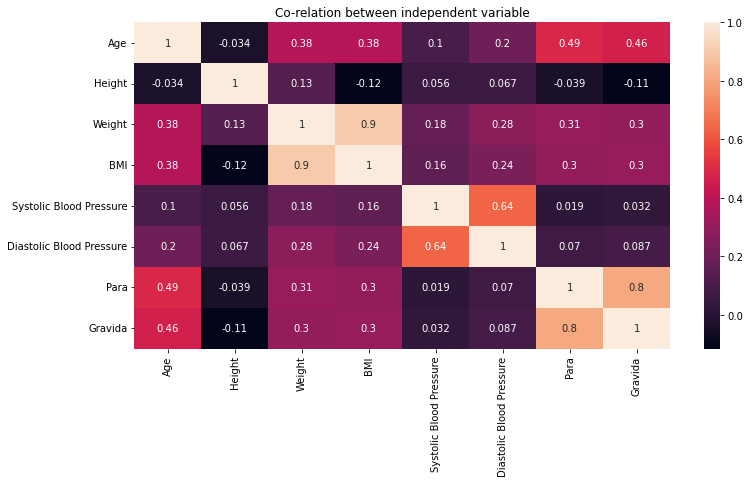

In [10]:
plt.figure(figsize=(12,6))
plt.title("Co-relation between independent variable")
sns.heatmap(df1.corr(),annot=True)
plt.show()

# Data Preprocessing

In [11]:
df1.dtypes

Age                              int64
Height                         float64
Weight                         float64
BMI                            float64
Blood Group ( is Negative?)     object
Delivery Type                   object
Systolic Blood Pressure        float64
Diastolic Blood Pressure       float64
Edema                           object
Anemia                          object
Jaundice                        object
Diabetes                        object
Risk                            object
Para                             int64
Gravida                          int64
dtype: object

In [12]:
df1.isna().sum()

Age                             0
Height                         12
Weight                          0
BMI                            12
Blood Group ( is Negative?)     0
Delivery Type                   0
Systolic Blood Pressure        11
Diastolic Blood Pressure       11
Edema                           0
Anemia                          0
Jaundice                        0
Diabetes                        0
Risk                            0
Para                            0
Gravida                         0
dtype: int64

In [13]:
df1.loc[df1.Height.isna()]

,Age,Height,Weight,BMI,Blood Group ( is Negative?),Delivery Type,Systolic Blood Pressure,Diastolic Blood Pressure,Edema,Anemia,Jaundice,Diabetes,Risk,Para,Gravida
35,24,NaN,43.6,NaN,No,Normal,110.0,80.0,Modarate,Modarate,No,No,Yes,1,2
52,30,NaN,84.0,NaN,No,Normal,120.0,70.0,Normal,Normal,No,No,Yes,2,3
102,25,NaN,57.0,NaN,No,Normal,100.0,70.0,Modarate,Normal,No,No,No,1,2
157,29,NaN,71.0,NaN,No,No_delivary,120.0,80.0,Normal,Normal,No,No,No,0,1
231,18,NaN,41.5,NaN,No,No_delivary,110.0,80.0,Normal,Normal,No,No,No,0,1
294,25,NaN,59.0,NaN,No,No_delivary,130.0,70.0,Normal,Normal,No,No,No,1,3
328,30,NaN,68.0,NaN,No,Normal,140.0,90.0,Normal,Normal,No,No,Yes,2,3
337,18,NaN,58.0,NaN,No,No_delivary,110.0,70.0,Normal,Normal,No,No,Yes,0,1
359,26,NaN,57.0,NaN,No,No_delivary,120.0,80.0,Normal,Normal,No,No,Yes,0,4
427,33,NaN,51.0,NaN,No,No_delivary,130.0,90.0,Normal,Normal,No,No,No,0,1


In [14]:
height_nan_index = df1['Height'].index[df1['Height'].apply(np.isnan)]
height_nan_index

Int64Index([35, 52, 102, 157, 231, 294, 328, 337, 359, 427, 474, 496], dtype='int64')

In [15]:
df1.Height = df1.Height.fillna(df1.Height.mean())

In [16]:
df1.Height.isna().sum()

0

In [17]:
for i in height_nan_index:
    df1.BMI[i] = (round((float(df1.Weight[i]) / df1.Height[i] ** 2), 2))

In [18]:
df1.isna().sum()

Age                             0
Height                          0
Weight                          0
BMI                             0
Blood Group ( is Negative?)     0
Delivery Type                   0
Systolic Blood Pressure        11
Diastolic Blood Pressure       11
Edema                           0
Anemia                          0
Jaundice                        0
Diabetes                        0
Risk                            0
Para                            0
Gravida                         0
dtype: int64

In [20]:
bmi_nan_index = df1['BMI'].index[df1['BMI'].apply(np.isnan)]
bmi_nan_index

Int64Index([], dtype='int64')

In [21]:
for i in bmi_nan_index:
    df1.BMI[i] = (round((float(df1.Weight[i]) / df1.Height[i] ** 2), 2))

In [22]:
df1.isna().sum()

Age                             0
Height                          0
Weight                          0
BMI                             0
Blood Group ( is Negative?)     0
Delivery Type                   0
Systolic Blood Pressure        11
Diastolic Blood Pressure       11
Edema                           0
Anemia                          0
Jaundice                        0
Diabetes                        0
Risk                            0
Para                            0
Gravida                         0
dtype: int64

In [23]:
df1['Systolic Blood Pressure'] = df1['Systolic Blood Pressure'].fillna(120)

In [24]:
df1['Diastolic Blood Pressure'] = df1['Diastolic Blood Pressure'].fillna(80)

In [25]:
df1.isna().sum()

Age                            0
Height                         0
Weight                         0
BMI                            0
Blood Group ( is Negative?)    0
Delivery Type                  0
Systolic Blood Pressure        0
Diastolic Blood Pressure       0
Edema                          0
Anemia                         0
Jaundice                       0
Diabetes                       0
Risk                           0
Para                           0
Gravida                        0
dtype: int64

# Model Building

In [26]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
col = ['Blood Group ( is Negative?)','Jaundice','Diabetes','Risk']
for x in col:
    df1[x] = encoder.fit_transform(df[x])
df1.head(5)

,Age,Height,Weight,BMI,Blood Group ( is Negative?),Delivery Type,Systolic Blood Pressure,Diastolic Blood Pressure,Edema,Anemia,Jaundice,Diabetes,Risk,Para,Gravida
0,25,5.3,50.7,19.80,0,No_delivary,110.0,90.0,Normal,Normal,0,0,0,0,1
1,30,5.0,86.3,37.16,0,Normal,110.0,80.0,Normal,Normal,0,0,0,2,3
2,26,5.1,58.8,24.49,0,Normal,120.0,80.0,Normal,Normal,0,0,0,2,3
3,26,5.1,86.8,36.16,0,Normal,120.0,80.0,Normal,Normal,0,1,1,1,2
4,36,4.8,85.8,42.90,0,Normal,110.0,80.0,Normal,Normal,0,0,1,1,2


In [27]:
df2 = pd.get_dummies(df1,drop_first=True)
df2.sample(2)

,Age,Height,Weight,BMI,Blood Group ( is Negative?),Systolic Blood Pressure,Diastolic Blood Pressure,Jaundice,Diabetes,Risk,Para,Gravida,Delivery Type_No_delivary,Delivery Type_Normal,Edema_Modarate,Edema_Normal,Anemia_Modarate,Anemia_Normal
78,27,4.11,71.7,31.93,0,120.0,80.0,0,0,0,2,3,0,1,0,1,0,1
22,26,5.40,68.0,25.73,0,110.0,90.0,0,0,0,0,1,1,0,0,1,0,1


In [28]:
from sklearn.model_selection import train_test_split
X = df2.drop(['Risk'],axis=1)

In [29]:
y = df2.Risk

In [30]:
from sklearn.svm import SVC

originalclass = []
predictedclass = []

def classification_report_with_accuracy_score(y_true, y_pred):
    originalclass.extend(y_true)
    predictedclass.extend(y_pred)
    return accuracy_score(y_true, y_pred) # return accuracy score


nested_score = cross_val_score(SVC(),X,y, cv=10, scoring=make_scorer(classification_report_with_accuracy_score))

print('cross_val_score : ',round(nested_score.mean(),2))
print('\nClassification Report : ')
print(classification_report(originalclass, predictedclass))

cross_val_score :  0.63

Classification Report : 
              precision    recall  f1-score   support

           0       0.63      1.00      0.77       330
           1       1.00      0.02      0.03       198

    accuracy                           0.63       528
   macro avg       0.81      0.51      0.40       528
weighted avg       0.77      0.63      0.49       528



In [31]:
from sklearn.ensemble import RandomForestClassifier

originalclass = []
predictedclass = []

def classification_report_with_accuracy_score(y_true, y_pred):
    originalclass.extend(y_true)
    predictedclass.extend(y_pred)
    return accuracy_score(y_true, y_pred) # return accuracy score


nested_score = cross_val_score(RandomForestClassifier(),X,y, cv=10, scoring=make_scorer(classification_report_with_accuracy_score))

print('cross_val_score : ',round(nested_score.mean(),2))
print('\nClassification Report : ')
print(classification_report(originalclass, predictedclass))

cross_val_score :  0.88

Classification Report : 
              precision    recall  f1-score   support

           0       0.88      0.94      0.91       330
           1       0.89      0.78      0.83       198

    accuracy                           0.88       528
   macro avg       0.88      0.86      0.87       528
weighted avg       0.88      0.88      0.88       528



In [32]:
from sklearn.tree import DecisionTreeClassifier

originalclass = []
predictedclass = []

def classification_report_with_accuracy_score(y_true, y_pred):
    originalclass.extend(y_true)
    predictedclass.extend(y_pred)
    return accuracy_score(y_true, y_pred) # return accuracy score


nested_score = cross_val_score(DecisionTreeClassifier(),X,y, cv=10, scoring=make_scorer(classification_report_with_accuracy_score))

print('cross_val_score : ',round(nested_score.mean(),2))
print('\nClassification Report : ')
print(classification_report(originalclass, predictedclass))

cross_val_score :  0.85

Classification Report : 
              precision    recall  f1-score   support

           0       0.86      0.90      0.88       330
           1       0.82      0.76      0.79       198

    accuracy                           0.85       528
   macro avg       0.84      0.83      0.84       528
weighted avg       0.85      0.85      0.85       528



In [33]:
from sklearn.linear_model import LogisticRegression

originalclass = []
predictedclass = []

def classification_report_with_accuracy_score(y_true, y_pred):
    originalclass.extend(y_true)
    predictedclass.extend(y_pred)
    return accuracy_score(y_true, y_pred) # return accuracy score


nested_score = cross_val_score(LogisticRegression(),X,y, cv=10, scoring=make_scorer(classification_report_with_accuracy_score))

print('cross_val_score : ',round(nested_score.mean(),2))
print('\nClassification Report : ')
print(classification_report(originalclass, predictedclass))

cross_val_score :  0.7

Classification Report : 
              precision    recall  f1-score   support

           0       0.71      0.88      0.79       330
           1       0.67      0.40      0.50       198

    accuracy                           0.70       528
   macro avg       0.69      0.64      0.64       528
weighted avg       0.69      0.70      0.68       528



In [34]:
from sklearn.neighbors import KNeighborsClassifier

originalclass = []
predictedclass = []

def classification_report_with_accuracy_score(y_true, y_pred):
    originalclass.extend(y_true)
    predictedclass.extend(y_pred)
    return accuracy_score(y_true, y_pred) # return accuracy score


nested_score = cross_val_score(KNeighborsClassifier(n_neighbors=3),X,y, cv=10, scoring=make_scorer(classification_report_with_accuracy_score))

print('cross_val_score : ',round(nested_score.mean(),2))
print('\nClassification Report : ')
print(classification_report(originalclass, predictedclass))

cross_val_score :  0.74

Classification Report : 
              precision    recall  f1-score   support

           0       0.75      0.88      0.81       330
           1       0.71      0.51      0.59       198

    accuracy                           0.74       528
   macro avg       0.73      0.69      0.70       528
weighted avg       0.73      0.74      0.73       528



In [35]:
from sklearn.neural_network import MLPClassifier

originalclass = []
predictedclass = []

def classification_report_with_accuracy_score(y_true, y_pred):
    originalclass.extend(y_true)
    predictedclass.extend(y_pred)
    return accuracy_score(y_true, y_pred) # return accuracy score


nested_score = cross_val_score(MLPClassifier(solver='lbfgs',hidden_layer_sizes=(20,)),
                               X,y, cv=10, scoring=make_scorer(classification_report_with_accuracy_score))

print('cross_val_score : ',round(nested_score.mean(),2))
print('\nClassification Report : ')
print(classification_report(originalclass, predictedclass))

cross_val_score :  0.68

Classification Report : 
              precision    recall  f1-score   support

           0       0.70      0.85      0.77       330
           1       0.61      0.38      0.47       198

    accuracy                           0.68       528
   macro avg       0.65      0.62      0.62       528
weighted avg       0.66      0.68      0.66       528

